### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing()

In [3]:
df=pd.DataFrame(data.data)
df.columns=data.feature_names

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df.shape

(20640, 8)

### Feature Engineering

In [6]:
def remove_outliers(df,x):
    #set limits
    q25,q75=np.percentile(df[x],25),np.percentile(df[x],75)
    iqr=q75-q25
    cut_off=iqr*1.5
    lower,upper=1,(q75+cut_off)
    df=df[(df[x]<upper)&(df[x]>lower)]
    print('outliers of "{}" are removed\n'.format(x))
    return df

outliers of "MedInc" are removed



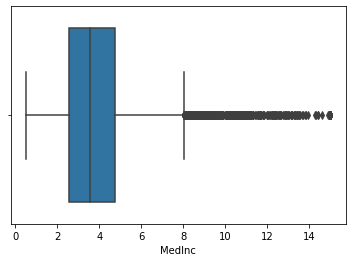

In [7]:
sns.boxplot(x=df['MedInc'])
df=remove_outliers(df,'MedInc')

<AxesSubplot:xlabel='HouseAge'>

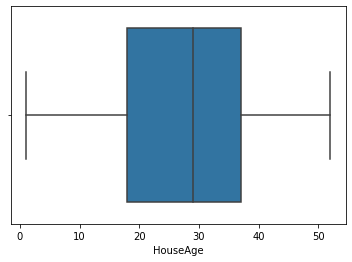

In [8]:
sns.boxplot(x=df['HouseAge'])

outliers of "AveRooms" are removed



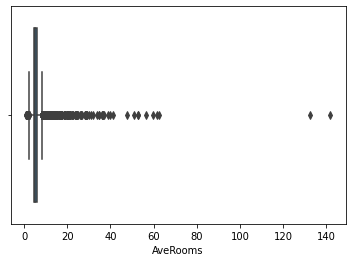

In [9]:
sns.boxplot(x=df['AveRooms'])
df=remove_outliers(df,'AveRooms')

outliers of "Population" are removed



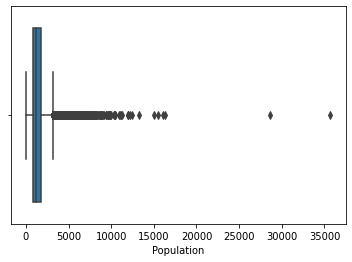

In [10]:
sns.boxplot(x=df['Population'])
df=remove_outliers(df,'Population')

outliers of "AveOccup" are removed



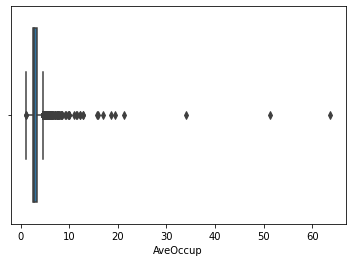

In [11]:
sns.boxplot(x=df['AveOccup'])
df=remove_outliers(df,'AveOccup')

<AxesSubplot:xlabel='Latitude'>

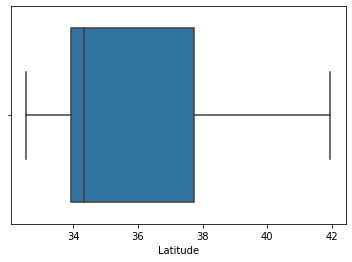

In [12]:
sns.boxplot(x=df['Latitude'])

<AxesSubplot:xlabel='Longitude'>

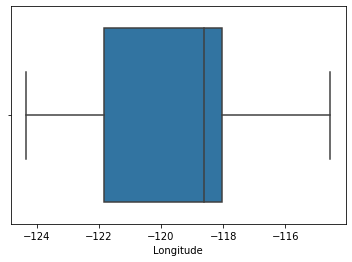

In [13]:
sns.boxplot(x=df['Longitude'])

In [14]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

### Plotting correlation heatmap

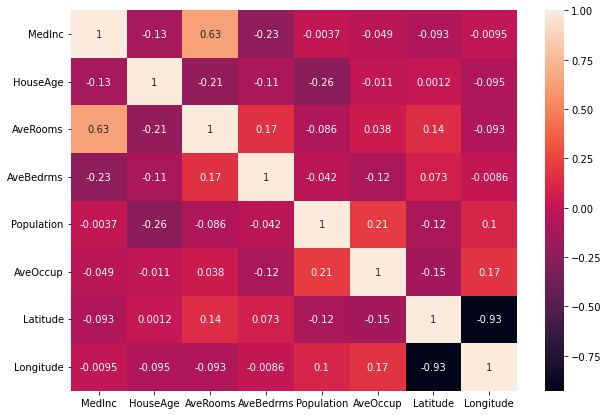

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
df.shape

(17714, 8)

### Separating dependant and independant variables

In [17]:
X=df.drop('MedInc',axis=1)
y=df.MedInc

### Splittting dataset into train-test-split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


### Trying Xgboost algorithm

In [20]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
x=XGBRegressor()
x.fit(X_train,y_train)
y_hat=x.predict(X_test)
mean_squared_error(y_hat,y_test)

0.5229630027181592

### Trying linear regression

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_hat2=lr.predict(X_test)
mean_squared_error(y_hat2,y_test)

0.7294688337976893

### Trying Random forest regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor()
r.fit(X_train,y_train)
y_hat3=r.predict(X_test)
mean_squared_error(y_hat3,y_test)

0.5250363387344327